
<p align="center">
    <img src="https://github.com/GeostatsGuy/GeostatsPy/blob/master/TCG_color_logo.png?raw=true" width="220" height="240" />

</p>

## Interactive Correlation Coefficient With an Outlier


### Michael Pyrcz, Professor, The University of Texas at Austin 

##### [Twitter](https://twitter.com/geostatsguy) | [GitHub](https://github.com/GeostatsGuy) | [Website](http://michaelpyrcz.com) | [GoogleScholar](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en&oi=ao) | [Book](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) | [YouTube](https://www.youtube.com/channel/UCLqEr-xV-ceHdXXXrTId5ig)  | [LinkedIn](https://www.linkedin.com/in/michael-pyrcz-61a648a1)


### Correlation Coefficient

Here is an interactive workflow demonstrating a limitation of the correlation coefficient, a common metric for analysis the relationship between two feautures, commonly used in inferential and predictive machine learning.

I have recorded a walk-through of this interactive dashboard in my [Data Science Interactive Python Demonstrations](https://www.youtube.com/playlist?list=PLG19vXLQHvSDy26fM3hDLg3VCU7U5BGZl) series on my [YouTube](https://www.youtube.com/@GeostatsGuyLectures) channel.

* Join me for walk-through of this dashboard [06 Data Science Interactive: Correlation Coefficient](TBD). I'm stoked to guide you and share observations and things to try out!   

* I have a lecture on [Correlation Analysis](https://www.youtube.com/watch?v=wZwYEDqB4A4&list=PLG19vXLQHvSB-D4XKYieEku9GQMQyAzjJ&index=21) as part of my [Data Analytics and Geostatistics](https://www.youtube.com/playlist?list=PLG19vXLQHvSB-D4XKYieEku9GQMQyAzjJ) course. Note, for all my recorded lecture the interactive and well-documented workflow demononstrations are available on my GitHub repository [GeostatsGuy's Python Numerical Demos](https://github.com/GeostatsGuy/PythonNumericalDemos).

* Also, I have a lecture on [Univariate Statistics](https://www.youtube.com/watch?v=wAcbA2cIqec&list=PLG19vXLQHvSB-D4XKYieEku9GQMQyAzjJ&index=10) as part of my [Data Analytics and Geostatistics](https://www.youtube.com/playlist?list=PLG19vXLQHvSB-D4XKYieEku9GQMQyAzjJ) course.

* Also, I have a lecture on [Principal Components Analysis](https://www.youtube.com/watch?v=-to3JXiae9Y&list=PLG19vXLQHvSC2ZKFIkgVpI9fCjkN38kwf&index=17) as part of my [Machine Learning](https://www.youtube.com/playlist?list=PLG19vXLQHvSC2ZKFIkgVpI9fCjkN38kwf) course.

#### Bivariate Analysis

Quantify the relationship between two features:

* e.g., relationship between porosity and permeability, nickle and copper grade, etc.

What would be the impact if we ignore this relationship and simply modeled eacf of our features independently?

* no relationship beyond constraints at data locations
* independent away from data
* nonphysical results, unrealistic uncertainty models

We must quantify relationships between our features and integrate them in our models.

#### Correlation Coefficient

Pearson’s Product‐Moment Correlation Coefficient
* provides a measure of the degree of linear relationship.
* we refer to it as the 'correlation coefficient'

Let's review the sample variance of feature, $\sigma^2_x$, where $X$ feature is represented by a set of samples a locations in our modeling space, $x(\bf{u}_\alpha)$,  $\alpha = 1, \dots, n$, but we will use the shorthand,  $x_{i}$,  $i = 1, \dots, n$.

\begin{equation}
\sigma^2_{x}  = \frac{\sum_{i=1}^{n} (x_i - \overline{x})^2}{(n-1)}
\end{equation}

We can expand the the squared term and replace on of them with $Y$, another feature in addition to $X$.

\begin{equation}
C_{x,y}  = \frac{\sum_{i=1}^{n} (x_i - \overline{x})(y_i - \overline{y})}{(n-1)}
\end{equation}

We now have a measure that represents the manner in which features $X$ and $Y$ co-vary or vary together.  We can standardized the covariance by the product of the standard deviations of $X$ and $Y$ to calculate the correlation coefficent. 

\begin{equation}
\rho_{x,y}  = \frac{\sum_{i=1}^{n} (x_i - \overline{x})(y_i - \overline{y})}{(n-1)\sigma_x \sigma_y}, \, -1.0 \le \rho_{x,y} \le 1.0
\end{equation}

#### Interpreting the Correlation Coefficient

Given a bivariate Gaussian distribution, we can make the following interpretations of correlation coefficients:

* $\rho_{x,y} = 1.0$ - perfect positive linear relationship
* $\rho_{x,y} = 0.0$ - no relationship
* $\rho_{x,y} = -1.0$ - perfect negative linear relationship

if not bivariate Gaussian this does not hold.

In summary we can state that the correlation coefficient is related to the covariance as:

\begin{equation}
\rho_{x,y}  = \frac{C_{x,y}}{\sigma_x \sigma_y}
\end{equation}

The correlation coefficient provides a useful metrics to quantify relationships between two features at a time. We can also consider bivariate scatter plots and matrix scatter plots to visualize multivariate data.

Other applications in machine learning with correlation coefficients, e.g.:

- the variance explained metric for linear regression is the correlation coefficient squared

\begin{equation}
R^2_{X,Y} = \left( \rho_{x,y} \right)^2 
\end{equation}

- principal components analysis are calculated as the Eigen values and vectors from the features' covariance matrix, the unstandardized correlation coefficient.

#### Limitations of the Correlation Coefficient

These are important limitations of the Pearson's product moment correlation coefficient:

1. measures the strength of the linear relationship between the two features. 
2. **sensitive to outliers**
3. assumes finite covariance, $C_{X,Y}$, and finite variances, $\sigma^2_X$, and $\sigma^2_Y$. 
4. only when the features are bivariate normal does the correlation coefficient provide a complete, unique description of the relationship between the two features, this includes homoscedasticity (constant conditional variance).

#### Spearman Rank Correlation Coefficient

The Person's correlation coefficient is quite sensitive to outliers and depature from linear behavoir (in the bivariate sense).  We have an altenrative known as the Spearman's rank correlations coefficient. 

\begin{equation}
\rho_{R_x,R_y}  = \frac{\sum_{i=1}^{n} (R_{x_i} - \overline{R_x})(R_{y_i} - \overline{R_y})} {(n-1)\sigma_{R_x}\sigma_{R_y}},  \ \ -1.0 \le \rho_{R_x,R_y} \le 1.0
\end{equation}

The rank correlation applies the rank transform to the data prior to calculating the correlation coefficent. To calculate the rank transform simply replace the data values with the rank $R_x = 1, \dots,n$, where $n$ is the maximum value and $1$ is the minimum value.

Given the samples are sorted in ascending order:

\begin{equation}
R_{x_i} = i, \ \  i = 1,\dots, n 
\end{equation}

#### Advantages of the Spearman Rank over the Pearson Product Moment Correlation Coefficient

In general, the Spearman rank correlation coefficient is more robust in the presence of:

* outliers 
* monotonic nonlinearity

The corelation coefficients provide useful metrics to quantify relationships between two variables at a time. We can also consider bivariate scatter plots and matrix scatter plots to visualize multivariate data. In general, current practical 
subsurface modeling is bivariate, two variables at a time.

#### Demonstration of a Rank Transform

What does the rank correlation coefficient see? Here's a dataset with an outlier before and after rank transform.

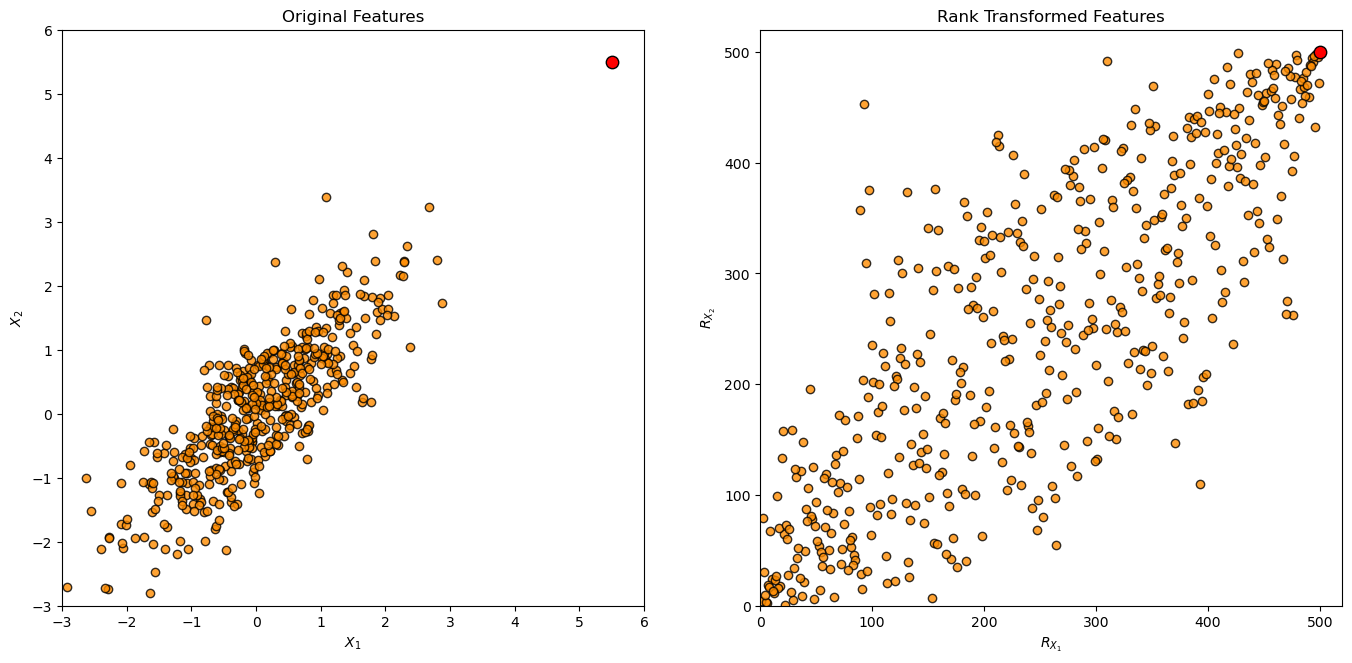

In [6]:
from scipy.stats import rankdata
import numpy as np
import matplotlib.pyplot as plt
sample = np.random.multivariate_normal([0.0,0.0],[[1.0,0.8],[0.8,1.0]],size = 500)
sample[-1,0] = 5.5; sample[-1,1] = 5.5 
sample_rank = rankdata(sample,axis=0)
plt.subplot(121)
plt.scatter(sample[:,0],sample[:,1],c='darkorange',alpha=0.8,edgecolor='black'); plt.xlim([-3,6]); plt.ylim([-3,6]); plt.xlabel(r'$X_1$'); plt.ylabel(r'$X_2$'); plt.title('Original Features')
plt.scatter(sample[-1,0],sample[-1,1],c='red',alpha=1.0,s=80,edgecolor='black',zorder=100);
plt.subplot(122)
plt.scatter(sample_rank[:,0],sample_rank[:,1],c='darkorange',alpha=0.8,edgecolor='black'); plt.xlim([0,520]); plt.ylim([0,520]); plt.xlabel(r'$R_{X_1}$'); plt.ylabel(r'$R_{X_2}$'); plt.title('Rank Transformed Features')
plt.scatter(sample_rank[-1,0],sample_rank[-1,1],c='red',alpha=1.0,s=80,edgecolor='black',zorder=100);
plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=1.2, wspace=0.2, hspace=0.3); plt.show()

#### Correlation Coefficient Dashboard

To demonstrate the correlation coefficient with an outlier, I built out 1 dashboard:

* change the correlation coefficient and move around a single outlier and observe the impact on the Pearson and Spearman correlation coefficients.

#### Getting Started

Here's the steps to get setup in Python with the GeostatsPy package:

1. Install Anaconda 3 on your machine (https://www.anaconda.com/download/). 

That's all!

#### Load the Required Libraries

We will also need some standard Python packages. These should have been installed with Anaconda 3.

In [2]:
%matplotlib inline
import os                                               # to set current working directory 
import sys                                              # supress output to screen for interactive variogram modeling
import io
import numpy as np                                      # arrays and matrix math
import pandas as pd                                     # DataFrames
from scipy import stats
import matplotlib.pyplot as plt                         # plotting
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator) # control of axes ticks
from matplotlib.pyplot import cm                        # color maps
from matplotlib.patches import Ellipse                  # plot an ellipse
import math                                             # sqrt operator
import random                                           # random simulation locations
from copy import copy                                   # copy a colormap
from scipy.stats import norm
from ipywidgets import interactive                      # widgets and interactivity
from ipywidgets import widgets                            
from ipywidgets import Layout
from ipywidgets import Label
from ipywidgets import VBox, HBox
from scipy.stats import norm                            # Gaussian distribution
import scipy.stats as st                                # statistical methods
plt.rc('axes', axisbelow=True)                          # set axes and grids in the background for all plots

If you get a package import error, you may have to first install some of these packages. This can usually be accomplished by opening up a command window on Windows and then typing 'python -m pip install [package-name]'. More assistance is available with the respective package docs.  

#### Declare Functions

I just added a convenience function for adding major and minor gridlines.

In [7]:
def add_grid(sub_plot):
    sub_plot.grid(True, which='major',linewidth = 1.0); sub_plot.grid(True, which='minor',linewidth = 0.2) # add y grids
    sub_plot.tick_params(which='major',length=7); sub_plot.tick_params(which='minor', length=4)
    sub_plot.xaxis.set_minor_locator(AutoMinorLocator()); sub_plot.yaxis.set_minor_locator(AutoMinorLocator()) # turn on minor ticks   

#### Interactive Correlation Coefficient with an Outlier

Now let's set up our dashboard.

In [8]:
import warnings; warnings.simplefilter('ignore')

# dashboard: number of simulation locations and variogram parameters
style = {'description_width': 'initial'}
l = widgets.Text(value='                                                  Correlation Coefficient with an Outlier, Michael Pyrcz, Professor, The University of Texas at Austin',layout=Layout(width='950px', height='30px'))
ndata = widgets.IntSlider(min = 5, max = 1000, value = 500, step = 100, description = r'$n_{samples}$',orientation='horizontal',continuous_update=False,
                          layout=Layout(width='600px', height='40px'))
ndata.style.handle_color = 'gray'

corr = widgets.FloatSlider(min = -1.0, max = 1.0, value = 0, step = 0.1, description = r'$\rho_{x_1,x_2}$',orientation='horizontal',continuous_update=False,
                          layout=Layout(width='600px', height='40px'))

ox = widgets.FloatSlider(min = 1.0, max = 2.8, value = 1, step = 0.1, description = r'$log(x_{n+1})$',orientation='horizontal',continuous_update=False,
                          layout=Layout(width='600px', height='40px'))

oy = widgets.FloatSlider(min = 1.0, max = 2.8, value = 1, step = 0.1, description = r'$log(y_{n+1})$',orientation='horizontal',continuous_update=False,
                          layout=Layout(width='600px', height='40px'))

corr.style.handle_color = 'gray'

uipars = widgets.HBox([ndata,corr,ox,oy],)     

uik = widgets.VBox([l,uipars],)

def f_make(ndata,corr,ox,oy): # function to take parameters, make sample and plot
    nonlin_wt = 1.0
    ox = 10**ox; oy = 10**oy
    text_trap = io.StringIO()                           # suppress all text function output to dashboard to avoid clutter 
    sys.stdout = text_trap
    cmap = cm.inferno
    np.random.seed(seed = 73072)                        # ensure same results for all runs
    mean = np.array([10,10])
    correl = np.array([[2.0,corr*2.0],[corr*2.0,2.0]],dtype=float)
    sample = np.random.multivariate_normal(mean,correl,size = ndata)
    sample = np.vstack([sample,[ox,oy]])
    slope, intercept, r_value, p_value, std_err = st.linregress(sample[:,0],sample[:,1])
    xmin = min(-3,ox-1); xmax = max(3,ox+1); ymin = min(-3,oy-1); ymax = max(3,oy+1)
    xmin = 1; ymin = 1; xmax = 1000; ymax = 1000
    x1 = np.array([xmin,xmax])
    x2 = x1*slope + intercept
    
    nbin = int(ndata / 10)
    plt_scatter = plt.subplot2grid((3, 3), (1, 0), rowspan=2, colspan=2)
    plt_x1 = plt.subplot2grid((3, 3), (0, 0), colspan=2,
                               sharex=plt_scatter)
    plt_x2 = plt.subplot2grid((3, 3), (1, 2), rowspan=2,
                               sharey=plt_scatter)    
    
    #plt.plot([0,0],[1.0,1.0],color = 'black')
    #plt_scatter.plot(x1,x2,color = 'black',label = r'$X_2 = f(X_1)$')
    plt_scatter.scatter(sample[:ndata-1,0],sample[:ndata-1,1],color = 'red',alpha = 0.05,edgecolors='black',label = 'Samples')
    #plt_scatter.scatter(ox,oy,color = 'blue',alpha = 1.0,marker='s',edgecolors='black',label = 'Outlier')
    plt_scatter.scatter(ox,oy,s=40,marker='x',color = 'black',alpha = 1.0,zorder=100,label='Outlier')
    plt_scatter.scatter(ox,oy,s=200,marker='o',lw=1.0,edgecolor = 'black',facecolor = 'white',alpha = 1.0,zorder=98)
    
    import matplotlib.ticker as ticker 
    
    plt_scatter.set_xlabel(r'$x_1$')
    plt_scatter.set_ylabel(r'$x_2$')
    plt_scatter.set_xlim([xmin,xmax])
    plt_scatter.set_ylim([ymin,ymax])
    plt_scatter.legend(loc='upper left') 
    plt_scatter.set_xscale('log'); plt_scatter.set_yscale('log')
    
    corr = stats.pearsonr(sample[:,0],sample[:,1])[0]
    plt_scatter.annotate(r'$\rho_{x_1,x_2}$ = ' + str(np.round(corr,3)),(xmin+(xmax-xmin)*0.15,ymax-(ymax-ymin)*0.9985),size=15)
    corrs = stats.spearmanr(sample[:,0],sample[:,1])[0]    
    plt_scatter.annotate(r'$\rho_{R_{x_1},R_{x_2}}$ = ' + str(np.round(corrs,3)),(xmin+(xmax-xmin)*0.15,ymax-(ymax-ymin)*0.9995),size=15)
    
    plt_x1.hist(sample[:,0],density = True,color='red',alpha=0.8,edgecolor='black',bins=np.logspace(np.log10(xmin),np.log10(xmax),nbin))
    plt_x1.set_ylim([0.0,0.3]); add_grid(plt_x1)
    plt_x1.set_xlabel(r'$x_1$'); plt_x1.set_ylabel(r'Density')
    plt_x1.set_title(r'Bivariate Gaussian Distributed Data with $\rho =$' + str(round(corr,2)) + ' & 1 Outlier')
    
    plt_x2.hist(sample[:,1],orientation='horizontal',density = True,color='red',alpha=0.8,edgecolor='black',bins=np.logspace(np.log10(ymin),np.log10(ymax),nbin))
    plt_x2.set_xlim([0.0,0.3]); plt_x2.set_ylabel(r'$x_2$'); plt_x2.set_xlabel(r'Density'); add_grid(plt_x2)
    plt_scatter.set_ylabel(r'$x_2$'); 
    
    
    locmin = ticker.LogLocator(base=10.0,subs=np.arange(0.1,0.9,0.1),numticks=12)
    plt_scatter.yaxis.set_minor_locator(locmin); plt_scatter.xaxis.set_minor_locator(locmin)
    plt_scatter.grid(which = 'both',axis = 'both', linewidth=0.3)
    plt_scatter.grid(which = 'major',axis = 'both', linewidth=1)
    plt.subplots_adjust(left=0.0, bottom=0.0, right=1.5, top=1.7, wspace=0.3, hspace=0.3); plt.show()
    
# connect the function to make the samples and plot to the widgets    
interactive_plot = widgets.interactive_output(f_make, {'ndata':ndata,'corr':corr,'ox':ox,'oy':oy})
#interactive_plot.clear_output(wait = True)               # reduce flickering by delaying plot updating

### Interactive Correlation Coefficient Demonstration

* select the number of data, correlation coefficient, an outlier and compare the Pearson product-momment and Spearman's rank correlation coefficients. 

#### Michael Pyrcz, Professor, The University of Texas at Austin 

##### [Twitter](https://twitter.com/geostatsguy) | [GitHub](https://github.com/GeostatsGuy) | [Website](http://michaelpyrcz.com) | [GoogleScholar](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en&oi=ao) | [Book](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) | [YouTube](https://www.youtube.com/channel/UCLqEr-xV-ceHdXXXrTId5ig)  | [LinkedIn](https://www.linkedin.com/in/michael-pyrcz-61a648a1) | [GeostatsPy](https://github.com/GeostatsGuy/GeostatsPy)

### The Inputs

Select the number of samples and the Pearson product-moment correlation coefficient:

* **$n_{samples}$**: number of samples, **$\rho_{x_1,x_2}$**: the Pearson product-moment correlation
* **$log(x_{n+1}$**, **$log(y_{n+1}$**: location of a single outlier 

In [9]:
display(uik, interactive_plot)                            # display the interactive plot

Output()

#### Comments

This was an interactive demonstration of the impact of an outlier on the Pearson product moment and Spearman's rank correlation coefficients. I am providing students an opportunity to play with data analytics, geostatistics and machine learning for experiential learning.
  
#### The Author:

### Michael Pyrcz, Professor, The University of Texas at Austin 
*Novel Data Analytics, Geostatistics and Machine Learning Subsurface Solutions*

With over 17 years of experience in subsurface consulting, research and development, Michael has returned to academia driven by his passion for teaching and enthusiasm for enhancing engineers' and geoscientists' impact in subsurface resource development. 

For more about Michael check out these links:

#### [Twitter](https://twitter.com/geostatsguy) | [GitHub](https://github.com/GeostatsGuy) | [Website](http://michaelpyrcz.com) | [GoogleScholar](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en&oi=ao) | [Book](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) | [YouTube](https://www.youtube.com/channel/UCLqEr-xV-ceHdXXXrTId5ig)  | [LinkedIn](https://www.linkedin.com/in/michael-pyrcz-61a648a1)

#### Want to Work Together?

I hope this content is helpful to those that want to learn more about subsurface modeling, data analytics and machine learning. Students and working professionals are welcome to participate.

* Want to invite me to visit your company for training, mentoring, project review, workflow design and / or consulting? I'd be happy to drop by and work with you! 

* Interested in partnering, supporting my graduate student research or my Subsurface Data Analytics and Machine Learning consortium (co-PIs including Profs. Foster, Torres-Verdin and van Oort)? My research combines data analytics, stochastic modeling and machine learning theory with practice to develop novel methods and workflows to add value. We are solving challenging subsurface problems!

* I can be reached at mpyrcz@austin.utexas.edu.

I'm always happy to discuss,

*Michael*

Michael Pyrcz, Ph.D., P.Eng. Professor, Cockrell School of Engineering and The Jackson School of Geosciences, The University of Texas at Austin

#### More Resources Available at: [Twitter](https://twitter.com/geostatsguy) | [GitHub](https://github.com/GeostatsGuy) | [Website](http://michaelpyrcz.com) | [GoogleScholar](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en&oi=ao) | [Book](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) | [YouTube](https://www.youtube.com/channel/UCLqEr-xV-ceHdXXXrTId5ig)  | [LinkedIn](https://www.linkedin.com/in/michael-pyrcz-61a648a1)  
  